In [2]:
# import necessary libraries
import numpy as np
import pandas as pd

In [3]:
# load the dataset
df=pd.read_csv("/kaggle/input/online-store-customer-data/online_store_customer_data.csv")

In [4]:
# load 1st 5 rows
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [5]:
# load last 5 rows
df.tail()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77
2511,5/1/2021,153699,Male,48.0,Single,California,Silver,workers,PayPal,1.0,1073.15


In [6]:
# determine the shape of data
df.shape

(2512, 11)

In [7]:
# determine the size of data
df.size

27632

In [8]:
# check column names
df.columns

Index(['Transaction_date', 'Transaction_ID', 'Gender', 'Age', 'Marital_status',
       'State_names', 'Segment', 'Employees_status', 'Payment_method',
       'Referal', 'Amount_spent'],
      dtype='object')

In [9]:
# checking null values
df.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

In [12]:
# dropping null values
df.dropna(inplace=True)

In [13]:
# checking change in shape after dropping null values
df.shape

(2044, 11)

In [14]:
# checking change in size after dropping null values
df.size

22484

In [15]:
# checking duplicate values
df.duplicated().value_counts()

False    2034
True       10
dtype: int64

In [16]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [17]:
# checking the count after dropping duplicate values
df.duplicated().value_counts()

False    2034
dtype: int64

In [33]:
# checking the change in shape after dropping the duplicate values
df.shape

(2034, 11)

In [34]:
# checking the change in size after dropping the duplicate values
df.size

22374

In [18]:
# determining the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2034 non-null   object 
 1   Transaction_ID    2034 non-null   int64  
 2   Gender            2034 non-null   object 
 3   Age               2034 non-null   float64
 4   Marital_status    2034 non-null   object 
 5   State_names       2034 non-null   object 
 6   Segment           2034 non-null   object 
 7   Employees_status  2034 non-null   object 
 8   Payment_method    2034 non-null   object 
 9   Referal           2034 non-null   float64
 10  Amount_spent      2034 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 190.7+ KB


In [19]:
# changing the datatype of date from object to datetime
df['Transaction_date']=df['Transaction_date'].apply(pd.to_datetime)

In [23]:
# changing the datatype of age and referal from float to integer
df['Age']=df['Age'].astype(int)
df['Referal']=df['Referal'].astype(int)

In [24]:
# checking the change in datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_date  2034 non-null   datetime64[ns]
 1   Transaction_ID    2034 non-null   int64         
 2   Gender            2034 non-null   object        
 3   Age               2034 non-null   int64         
 4   Marital_status    2034 non-null   object        
 5   State_names       2034 non-null   object        
 6   Segment           2034 non-null   object        
 7   Employees_status  2034 non-null   object        
 8   Payment_method    2034 non-null   object        
 9   Referal           2034 non-null   int64         
 10  Amount_spent      2034 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 190.7+ KB


In [25]:
# checking the change in values of dataset
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,151200,Female,19,Single,Kansas,Basic,Unemployment,Other,1,2051.36
1,2019-01-01,151201,Male,49,Single,Illinois,Basic,self-employed,Card,0,544.04
2,2019-01-01,151202,Male,63,Married,New Mexico,Basic,workers,PayPal,1,1572.60
5,2019-01-03,151205,Male,71,Single,Hawaii,Basic,Employees,PayPal,1,2922.66
6,2019-01-03,151206,Female,34,Married,New Mexico,Platinum,Employees,PayPal,1,1481.42


In [32]:
# statistical summary of age and amount_spent
df.drop(columns=['Transaction_ID', 'Referal']).describe()

,Age,Amount_spent
count,2034.000000,2034.000000
mean,46.897247,1430.370492
std,18.218701,884.733030
min,15.000000,2.090000
25%,32.000000,678.192500
50%,47.000000,1358.310000
75%,62.000000,2056.622500
max,78.000000,2999.980000


In [39]:
# checking the unique values in each column
df.nunique()

Transaction_date     787
Transaction_ID      2034
Gender                 2
Age                   63
Marital_status         2
State_names           50
Segment                5
Employees_status       4
Payment_method         3
Referal                2
Amount_spent        2028
dtype: int64

In [60]:
# correcting the index
df.reset_index(inplace=True)

In [93]:
df.drop(columns=['index', 'Transaction_ID'], inplace=True)

In [94]:
# data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Text(0.5, 1.0, 'Distribution of Transactions by Date')

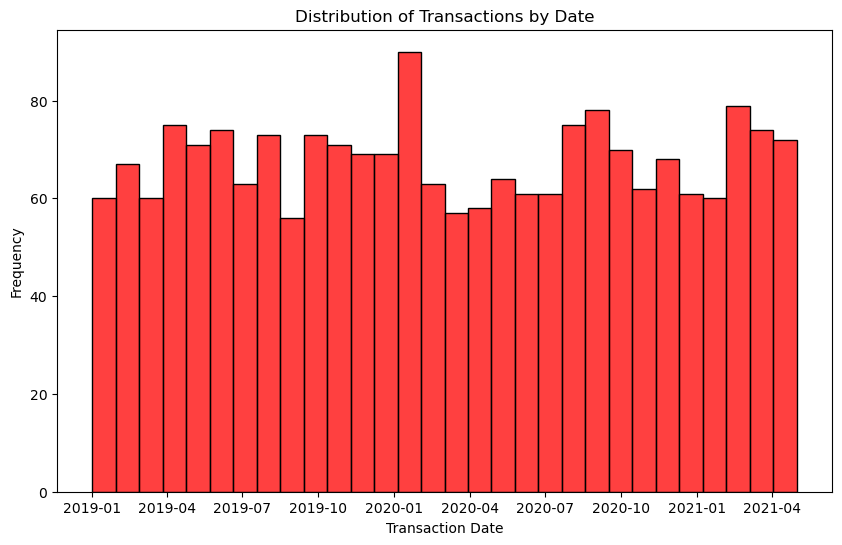

In [96]:
# Univariate analysis for Transaction_date
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Transaction_date", color='red', bins=30)
plt.xlabel("Transaction Date")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions by Date")

Text(0.5, 1.0, 'Distribution of Customers by Age')

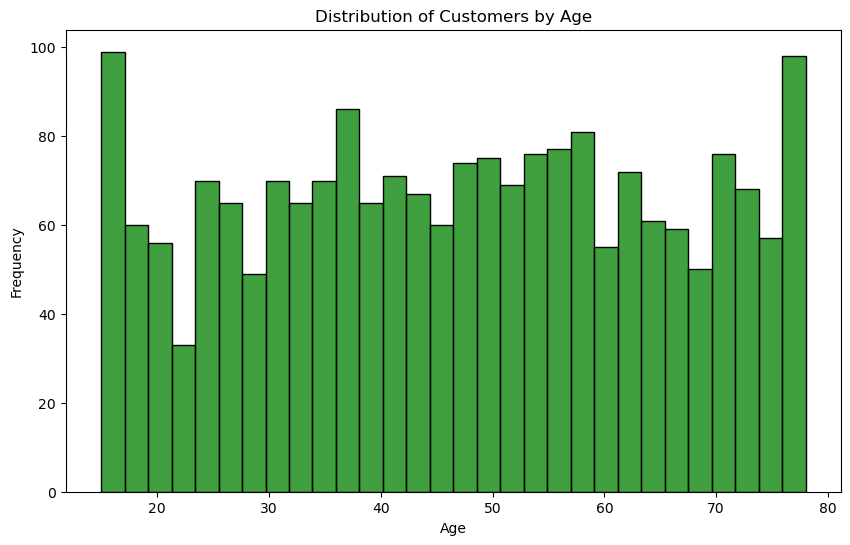

In [97]:
# Univariate analysis for Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", color='green', bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Customers by Age")

Text(0.5, 1.0, 'Distribution of Customers by Marital Status')

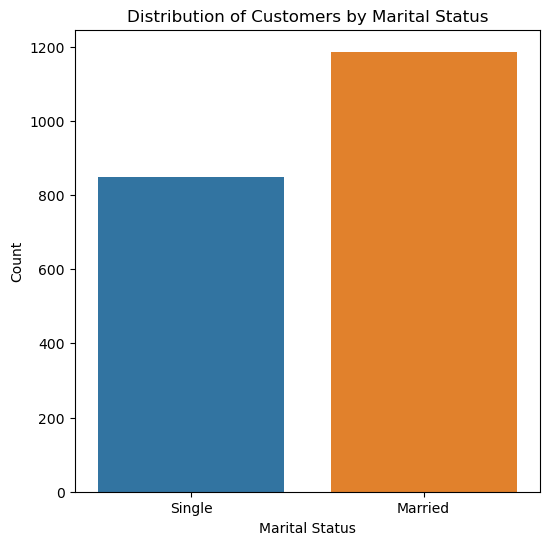

In [98]:
# Univariate analysis for Marital_status
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Marital_status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Customers by Marital Status")

Text(0.5, 1.0, 'Distribution of Customers by State')

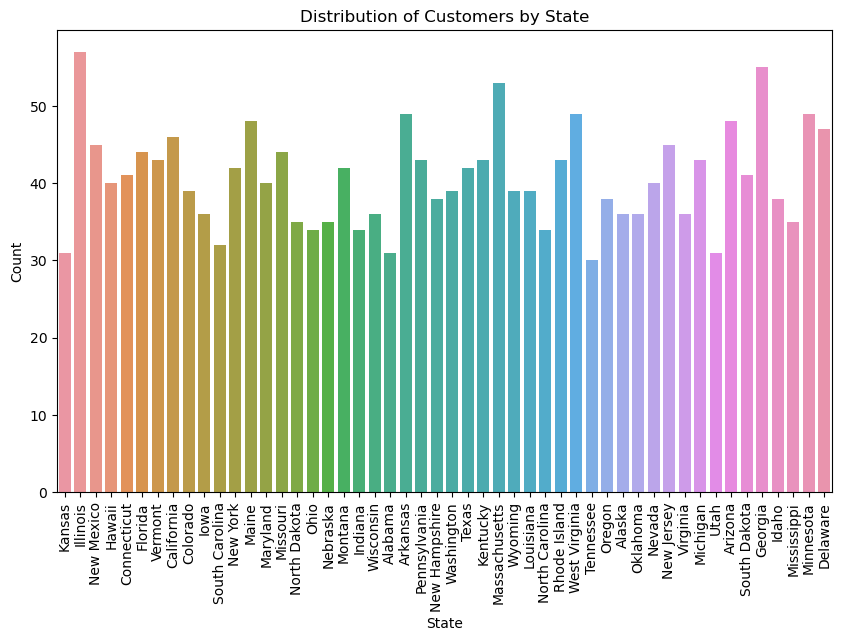

In [99]:
# Univariate analysis for State_names
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="State_names")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of Customers by State")

Text(0.5, 1.0, 'Distribution of Customers by Gender')

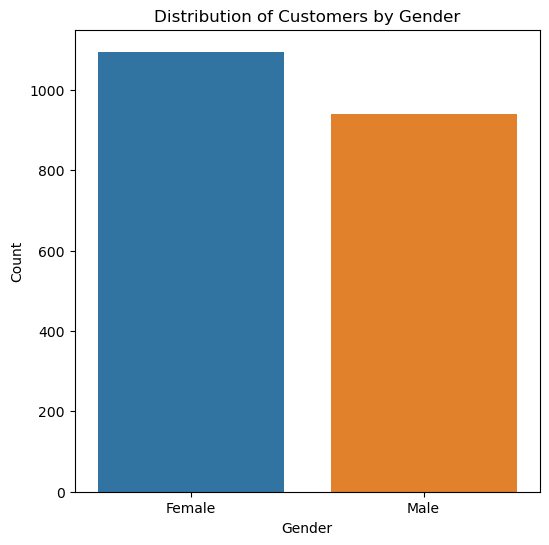

In [100]:
# Univariate analysis for Gender
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Customers by Gender")

Text(0.5, 1.0, 'Distribution of Customers by Segment')

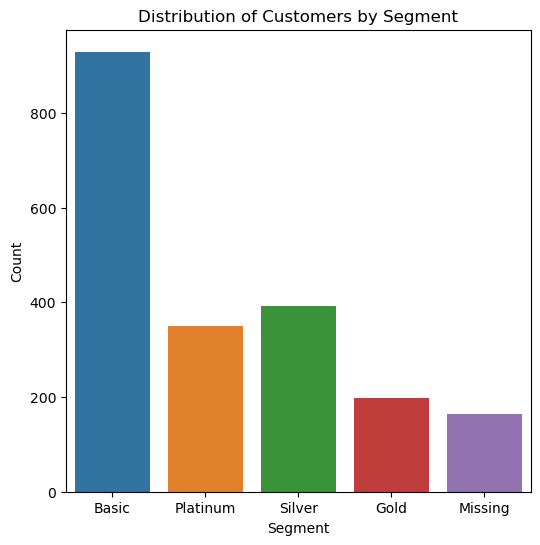

In [101]:
# Univariate analysis for Segment
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.title("Distribution of Customers by Segment")

Text(0.5, 1.0, 'Distribution of Customers by Employment Status')

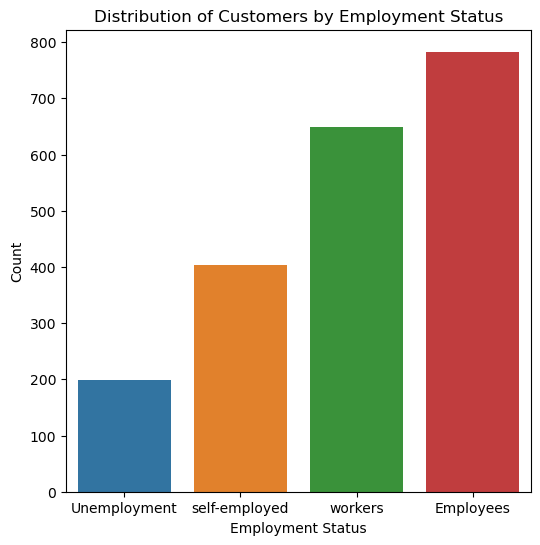

In [102]:
# Univariate analysis for Employees_status
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Employees_status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.title("Distribution of Customers by Employment Status")

Text(0.5, 1.0, 'Distribution of Transactions by Payment Method')

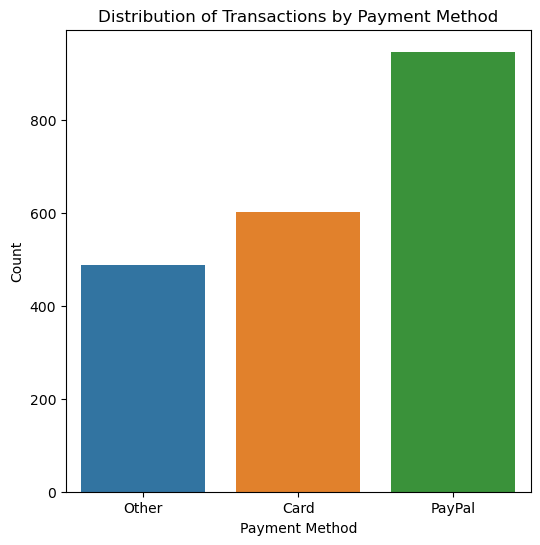

In [103]:
# Univariate analysis for Payment_method
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Payment_method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Distribution of Transactions by Payment Method")

Text(0.5, 1.0, 'Distribution of Transactions by Referral')

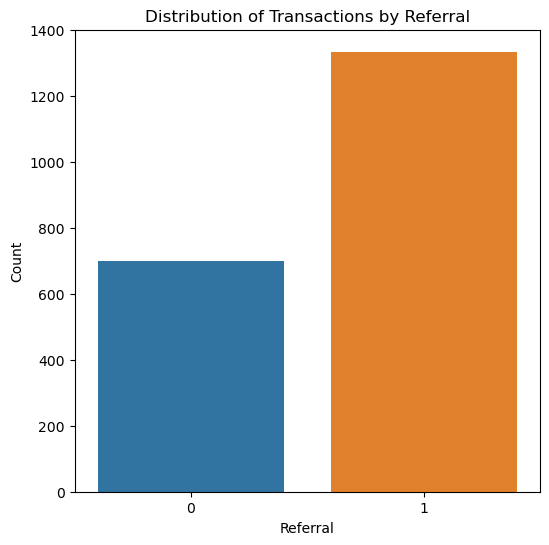

In [104]:
# Univariate analysis for Referal
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Referal")
plt.xlabel("Referral")
plt.ylabel("Count")
plt.title("Distribution of Transactions by Referral")

Text(0.5, 1.0, 'Distribution of Transactions by Amount Spent')

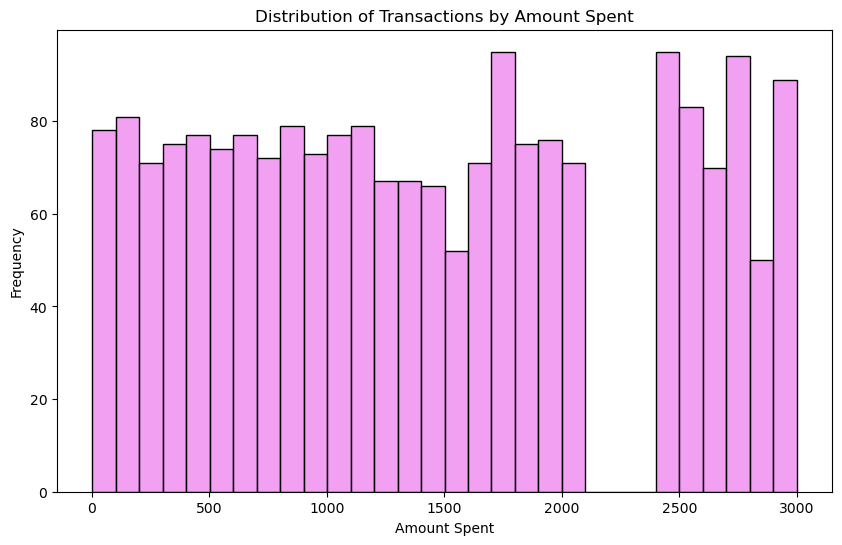

In [172]:
# Univariate analysis for Amount_spent
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Amount_spent", color='violet', bins=30)
plt.xlabel("Amount Spent")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions by Amount Spent")

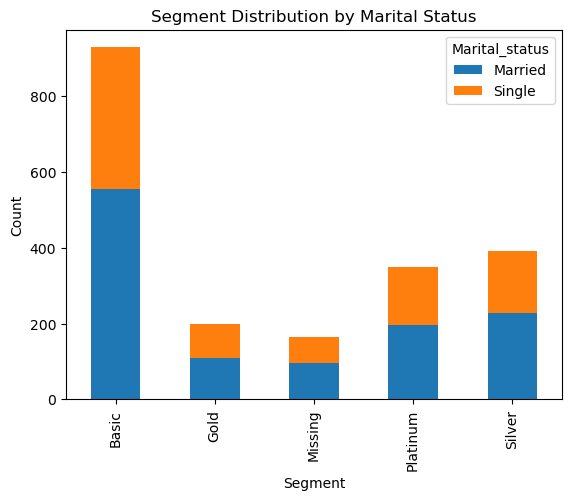

In [141]:
# BIVARIATE ANALYSIS OF segment and marital status
# Group the data by segment, and calculate the count of each marital status group
grouped = df.groupby(['Segment'])['Marital_status'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Add axis labels and title
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution by Marital Status')

# Show the plot
plt.show()

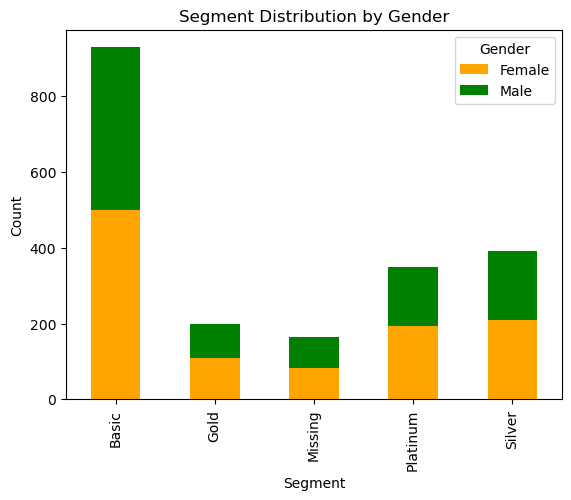

In [158]:
# BIVARIATE ANALYSIS OF segment and gender
# Group the data by segment, and calculate the count of each gender group
grouped = df.groupby(['Segment'])['Gender'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['orange', 'green'], stacked=True)

# Add axis labels and title
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution by Gender')

# Show the plot
plt.show()

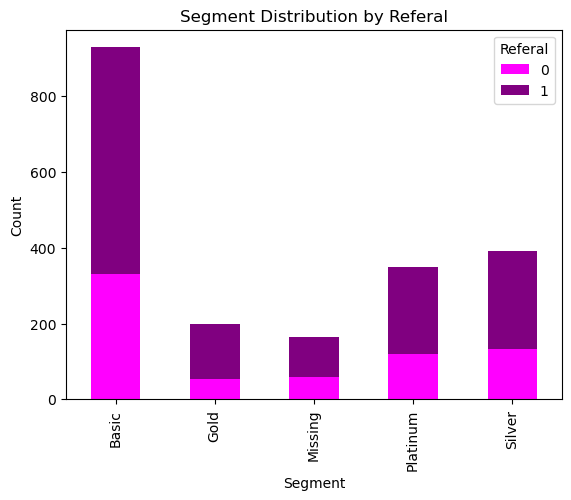

In [180]:
# BIVARIATE ANALYSIS OF segment and referal
# Group the data by segment, and calculate the count of each referal group
grouped = df.groupby(['Segment'])['Referal'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['magenta', 'purple'], stacked=True)

# Add axis labels and title
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Segment Distribution by Referal')

# Show the plot
plt.show()

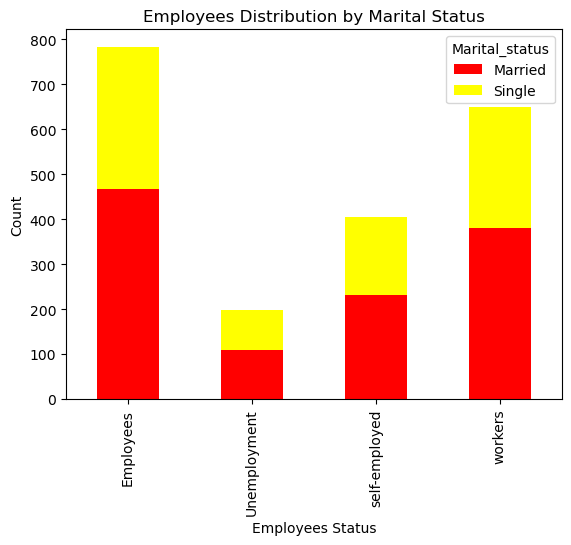

In [160]:
# BIVARIATE ANALYSIS OF employees status and marital status
# Group the data by employees status, and calculate the count of each marital status
grouped = df.groupby(['Employees_status'])['Marital_status'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['red', 'yellow'], stacked=True)

# Add axis labels and title
plt.xlabel('Employees Status')
plt.ylabel('Count')
plt.title('Employees Distribution by Marital Status')

# Show the plot
plt.show()

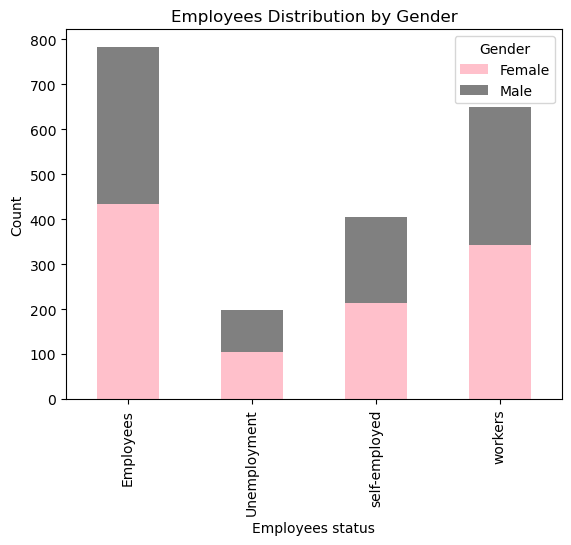

In [171]:
# BIVARIATE ANALYSIS OF employees status and gender
# Group the data by employees status, and calculate the count of each gender group
grouped = df.groupby(['Employees_status'])['Gender'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['pink', 'grey'], stacked=True)

# Add axis labels and title
plt.xlabel('Employees status')
plt.ylabel('Count')
plt.title('Employees Distribution by Gender')

# Show the plot
plt.show()

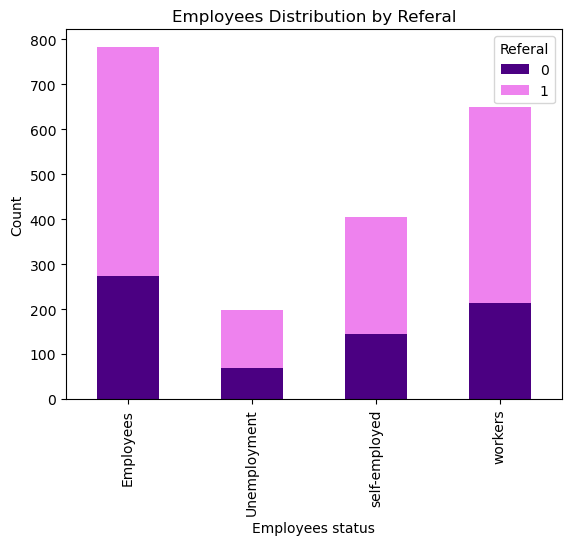

In [170]:
# BIVARIATE ANALYSIS OF employee status and referal
# Group the data by employees status, and calculate the count of each referal group
grouped = df.groupby(['Employees_status'])['Referal'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['indigo', 'violet'], stacked=True)

# Add axis labels and title
plt.xlabel('Employees status')
plt.ylabel('Count')
plt.title('Employees Distribution by Referal')

# Show the plot
plt.show()

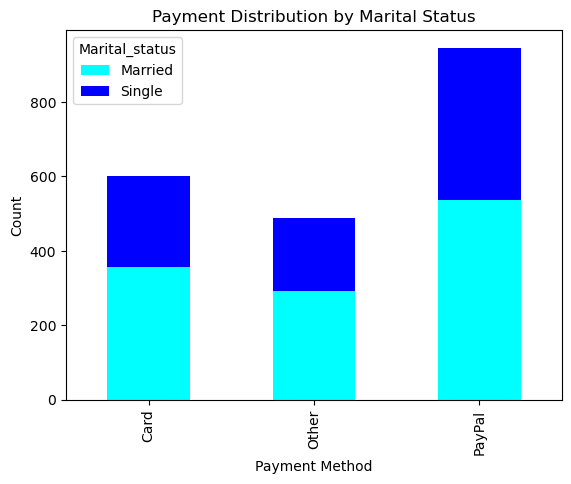

In [166]:
# BIVARIATE ANALYSIS OF payment method and marital status
# Group the data by payment method, and calculate the count of each marital status
grouped = df.groupby(['Payment_method'])['Marital_status'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['cyan', 'blue'], stacked=True)

# Add axis labels and title
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Distribution by Marital Status')

# Show the plot
plt.show()

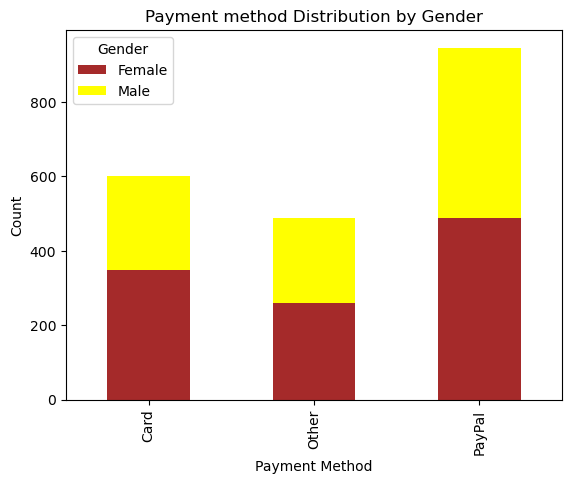

In [167]:
# BIVARIATE ANALYSIS OF payment method and gender
# Group the data by payment, and calculate the count of each gender group
grouped = df.groupby(['Payment_method'])['Gender'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['brown', 'yellow'], stacked=True)

# Add axis labels and title
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment method Distribution by Gender')

# Show the plot
plt.show()

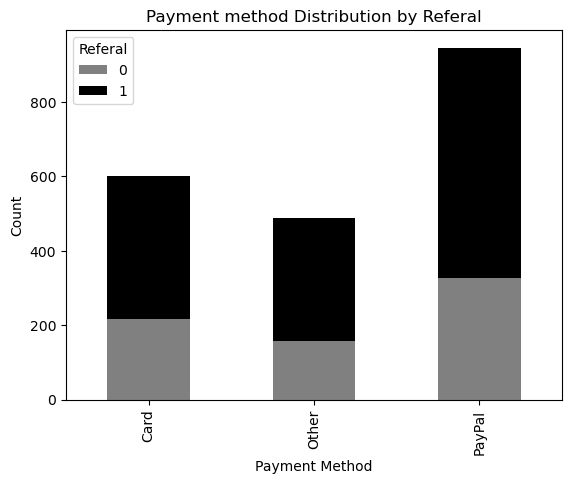

In [169]:
# BIVARIATE ANALYSIS OF payment method and referal
# Group the data by payment, and calculate the count of each referal group
grouped = df.groupby(['Payment_method'])['Referal'].value_counts().unstack(fill_value=0)

# Plot the stacked bar chart
grouped.plot(kind='bar', color=['grey', 'black'], stacked=True)

# Add axis labels and title
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment method Distribution by Referal')

# Show the plot
plt.show()

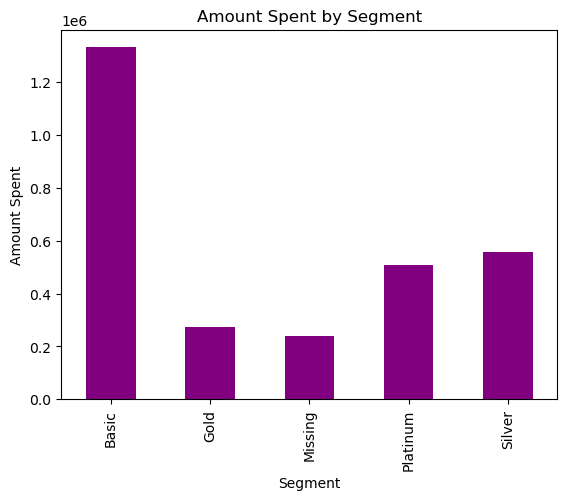

In [152]:
# BIVARIATE ANALYSIS OF segment and amount spent
# Create a bar chart of the amount spent by segment
segment_amounts = df.groupby('Segment')['Amount_spent'].sum()
segment_amounts.plot(kind='bar', xlabel='Segment', ylabel='Amount Spent', title='Amount Spent by Segment', color='purple')
plt.show()

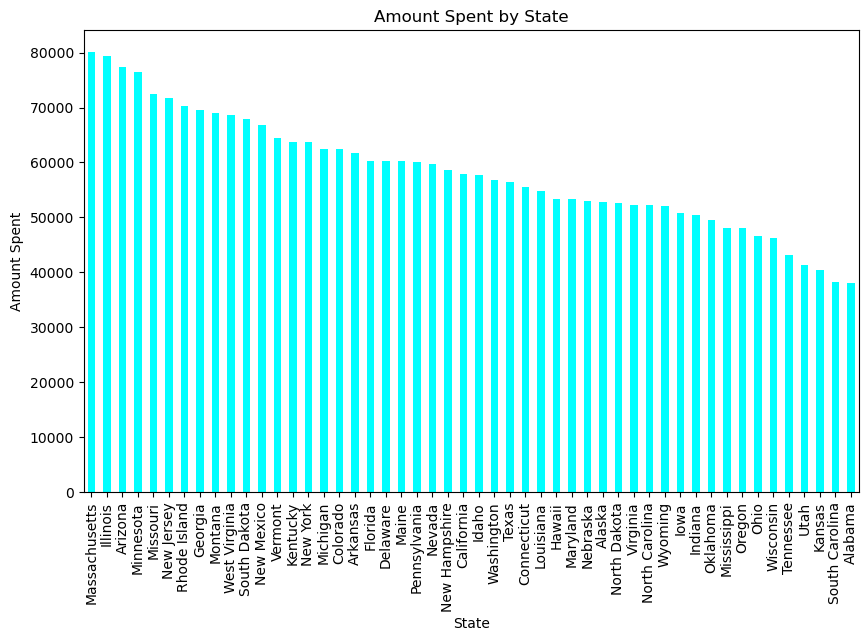

In [183]:
# BIVARIATE ANALYSIS OF state and amount spent
# Create a bar chart of the amount spent by state
segment_amounts = df.groupby('State_names')['Amount_spent'].sum().sort_values(ascending=False)
segment_amounts.plot(kind='bar', xlabel='State', ylabel='Amount Spent', figsize=(10,6), title='Amount Spent by State', color='cyan')
plt.show()